# Bağımsız İki Örneklerm T Testi

iki grup  arasında karşılaştırma yapılmak istendiğinde kullanılır

elimizde gerçek değerlerini bilmediğimiz iki tane ana kitle parametresi var  ki bunlar iki farklı ana kitlenin ortalmaları

bunların birbirinden farkını inceliyoruz. buna yönelik olarka elde ettiğmiz örneklemler üzerinden karşılaştırma yapıyoruz

gerçekte böyle bir farkın var olup olmadığına bakıyoruz


iki tane varsayımımız var
* normallik

* varyans Homojenliği

--------
# İş Uygulaması

## Problem
Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile
eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniyor

## Detaylar
* Model geliştirilmiş ve web sistesine entegre edilmiş.
* Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun
* A grubu eski B grubu yeni sistem
* Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor

H0: m1=m2

H1: m1!=m2

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Veri Tipi 1
#gelen veri istediğimimz şekilde olursa direkt aşşağidaki gibi kolayca birleştirip işlem yapabiliriz
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])
A_B=pd.concat([A,B],axis=1)
A_B.columns=["A","B"]
A_B.head()     

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [19]:
# Veri Tipi II 
# ancak veri isteğimiz gibi düzgün değilse aşşağıdaki gibi taklalar atarak işlem yapabileceğimiz hale getirmeliyiz
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])
# FOR A
A_=np.arange(len(A))
A_=pd.DataFrame(A_)
A_[:]="A"
A_=pd.concat([A,A_],axis=1)
A_.columns=["deger","grup"]

#FOR B
B_=np.arange(len(B))
B_=pd.DataFrame(B_)
B_[:]="B"
B_=pd.concat([B,B_],axis=1)
B_.columns=["deger","grup"]

#BİRLEŞTİRELİM
AB=pd.concat([A_,B_],axis=0)
print(AB.head())
print(AB.tail())

   deger grup
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    deger grup
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


<AxesSubplot: xlabel='grup', ylabel='deger'>

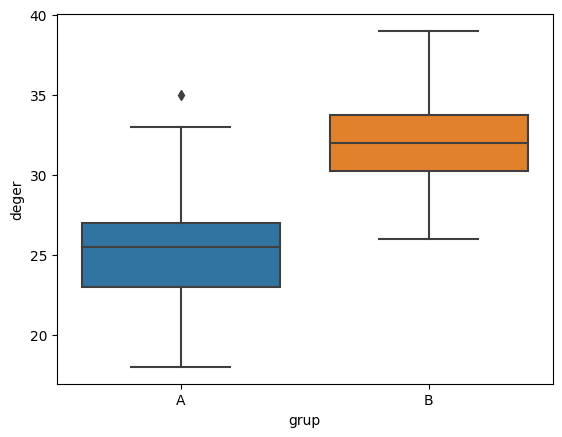

In [20]:
sns.boxplot(x="grup",y="deger",data=AB)

evet gerçekten de B grubu daha yüksek gözüküyor ama bunun şans eseri olup olmadığını, bu farkın anlamlı olup olmadığının testini yapıcaz :))

In [34]:
# Normallik kontrolü
import scipy.stats as stats
from scipy.stats import shapiro
#testi yaparken değişkenleri tek tek çekip normalliğe bakmak daha iyidir

In [27]:
shapiro(A_B.A)

ShapiroResult(statistic=0.978924572467804, pvalue=0.7962900400161743)

In [28]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

p > 0.05 o zaman H0(:örnek dağılım ve teorşk normal dağılım arasında istatistiksel olarak anlamlı farklılık yoktur) red edilemedi yani normal :))

In [ ]:
# Varyans Homojenliği Varsayımı



H0: Varyans Homojendir

H1: Varyans homojen değildir

In [36]:
stats.levene(A_B.A, A_B.B)
#iki değişkeni birden veriyoruz

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)